# Global Explanations

## Import

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
from lime.lime_tabular import LimeTabularExplainer
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
import shap
shap.initjs()


## Load Your Saved Joblib File

In [2]:
folder = "Models/"
fname = folder+'Project1.joblib'

loaded_joblib = joblib.load(fname)


In [3]:
# check type 
type(loaded_joblib)

dict

In [4]:
# check keys
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'Decisiontree', 'LinearRegression', 'RandomForestRegressor'])

In [5]:
# Save each object from the loaded_joblib dictionary as a separate variable

X_train = loaded_joblib['X_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
y_train = loaded_joblib['y_train']
preprocessor = loaded_joblib['preprocessor']
LinearRegression = loaded_joblib['LinearRegression']
RandomForestRegressor = loaded_joblib['RandomForestRegressor']
Decisiontree = loaded_joblib['Decisiontree']



In [6]:
# check
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002949056F490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002949056F7C0>)],
                  verbose_feature_names_out=False)

In [7]:
# check 
X_train

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Weight_y  \
24076         0.105126  143.2812                     2004.0         14.000   
33618         0.046375  122.8414                     1997.0         15.000   
37816         0.054870   40.5480                     1985.0         13.850   
26713         0.150807  149.0076                     1985.0          7.300   
28861         0.082894  149.3076                     2007.0          8.235   
...                ...       ...                        ...            ...   
28747         0.119462  182.7976                     1997.0         16.700   
26035         0.143129   58.8878                     1997.0          8.905   
27047         0.023631  141.7154                     1985.0         10.500   
4380          0.048802  132.1626                     2007.0          5.465   
36150         0.060649  232.7616                     1987.0         20.350   

       Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
24076                       0.0                       1.0   
33618                       1.0                       0.0   
37816                       1.0                       0.0   
26713                       1.0                       0.0   
28861                       1.0                       0.0   
...                         ...                       ...   
28747                       0.0                       1.0   
26035                       1.0                       0.0   
27047                       0.0                       1.0   
4380                        0.0                       1.0   
36150                       1.0                       0.0   

       Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
24076                     0.0               0.0                  0.0   
33618                     0.0               1.0                  0.0   
37816                     0.0               0.0                  0.0   
26713                     0.0               0.0                  0.0   
28861                     1.0               0.0                  0.0   
...                       ...               ...                  ...   
28747                     0.0               0.0                  0.0   
26035                     0.0               0.0                  0.0   
27047                     0.0               0.0                  0.0   
4380                      1.0               0.0                  0.0   
36150                     1.0               0.0                  0.0   

       Item_Type_Canned  ...  Outlet_Size_Medium  Outlet_Size_Small  \
24076               0.0  ...                 0.0                1.0   
33618               0.0  ...                 0.0                1.0   
37816               0.0  ...                 0.0                1.0   
26713               0.0  ...                 0.0                1.0   
28861               0.0  ...                 0.0                0.0   
...                 ...  ...                 ...                ...   
28747               0.0  ...                 0.0                1.0   
26035               0.0  ...                 0.0                1.0   
27047               0.0  ...                 0.0                1.0   
4380                0.0  ...                 0.0                0.0   
36150               0.0  ...                 0.0                0.0   

       Outlet_Size_Unknown  Outlet_Location_Type_Tier 1  \
24076                  0.0                          0.0   
33618                  0.0                          1.0   
37816                  0.0                          1.0   
26713                  0.0                          1.0   
28861                  1.0                          0.0   
...                    ...                          ...   
28747                  0.0                          1.0   
26035                  0.0                          1.0   
27047                  0.0                          1.0   
4380                   1.0   

# Explain Radom Forest model with SHAP

## Reduce sample size 

Create an X_shap and y_shap variable from your training data

In [8]:
X_shap = shap.sample(X_train,nsamples=1000, random_state=321)
X_shap

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Weight_y  \
26737         0.074496  251.9724                     2002.0          9.500   
28066         0.232122   55.5298                     1998.0          5.325   
27792         0.027052   73.9354                     2007.0         20.700   
13535         0.033778  222.8456                     1985.0          6.695   
22719         0.187919   65.4168                     1998.0          8.420   
...                ...       ...                        ...            ...   
12222         0.052594  111.0228                     1998.0          6.260   
4030          0.000000   53.0640                     2004.0         14.000   
40931         0.041474   93.0804                     1997.0         17.350   
21265         0.024701  176.8686                     2002.0         13.150   
23647         0.099963  193.8452                     1997.0          7.235   

       Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
26737                       1.0                       0.0   
28066                       0.0                       1.0   
27792                       1.0                       0.0   
13535                       1.0                       0.0   
22719                       1.0                       0.0   
...                         ...                       ...   
12222                       1.0                       0.0   
4030                        0.0                       1.0   
40931                       0.0                       1.0   
21265                       1.0                       0.0   
23647                       1.0                       0.0   

       Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
26737                     0.0               0.0                  0.0   
28066                     0.0               0.0                  0.0   
27792                     0.0               0.0                  0.0   
13535                     0.0               0.0                  0.0   
22719                     0.0               0.0                  0.0   
...                       ...               ...                  ...   
12222                     0.0               0.0                  0.0   
4030                      0.0               0.0                  0.0   
40931                     0.0               0.0                  0.0   
21265                     0.0               0.0                  0.0   
23647                     0.0               0.0                  0.0   

       Item_Type_Canned  ...  Outlet_Size_Medium  Outlet_Size_Small  \
26737               0.0  ...                 0.0                0.0   
28066               0.0  ...                 0.0                0.0   
27792               0.0  ...                 0.0                0.0   
13535               0.0  ...                 1.0                0.0   
22719               0.0  ...                 0.0                0.0   
...                 ...  ...                 ...                ...   
12222               0.0  ...                 0.0                0.0   
4030                0.0  ...                 0.0                1.0   
40931               0.0  ...                 0.0                1.0   
21265               0.0  ...                 0.0                0.0   
23647               0.0  ...                 0.0                1.0   

       Outlet_Size_Unknown  Outlet_Location_Type_Tier 1  \
26737                  1.0                          0.0   
28066                  1.0                          0.0   
27792                  1.0                          0.0   
13535                  0.0                          0.0   
22719                  1.0                          0.0   
...                    ...                          ...   
12222                  1.0                          0.0   
4030                   0.0                          0.0   
40931                  0.0                          1.0   
21265                  1.0   

In [9]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

26737    2516.7240
28066      53.9298
27792    1655.1788
13535    7073.4592
22719     127.8336
           ...    
12222     221.0456
4030      905.4880
40931     826.9236
21265    2133.2232
23647    1957.4520
Name: Item_Outlet_Sales, Length: 1000, dtype: float64

## Create a model explainer

In [10]:
explainer = shap.Explainer(RandomForestRegressor)
explainer

## Calculate the shap values for your model.

In [11]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(1000, 43)

In [12]:
# check X_shape
X_shap.shape

(1000, 43)

## Create a summary plot - with plot_type='bar':

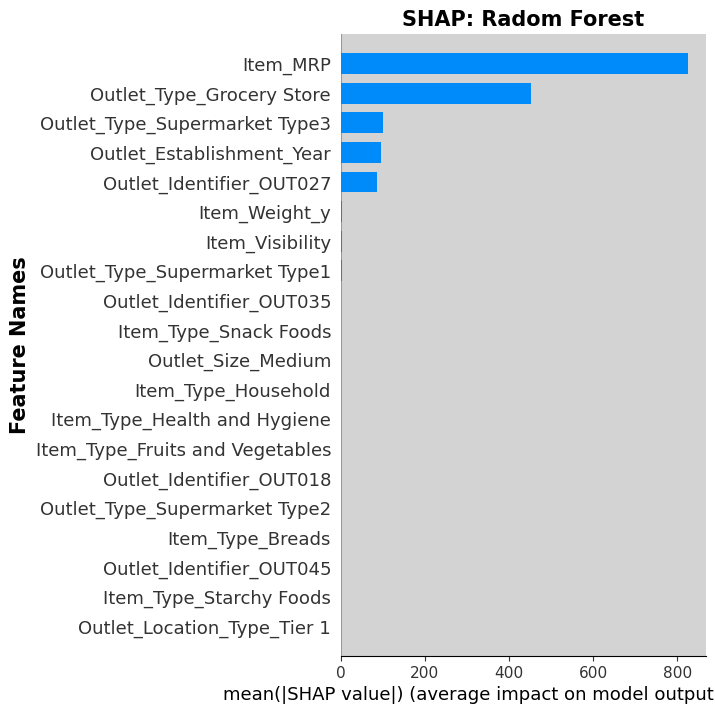

In [13]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type='bar', plot_size=(7,7), show=False)
ax.set_title('SHAP: Radom Forest', fontsize = 15, weight = 'bold')
ax.set_ylabel('Feature Names', fontsize = 15, fontweight='bold')
ax.set_facecolor("lightgray")
fig.savefig(r'C:\Users\esnak\OneDrive\Desktop\coding_dojo/summary_barplot_rf.png')


# Important features: Random forest

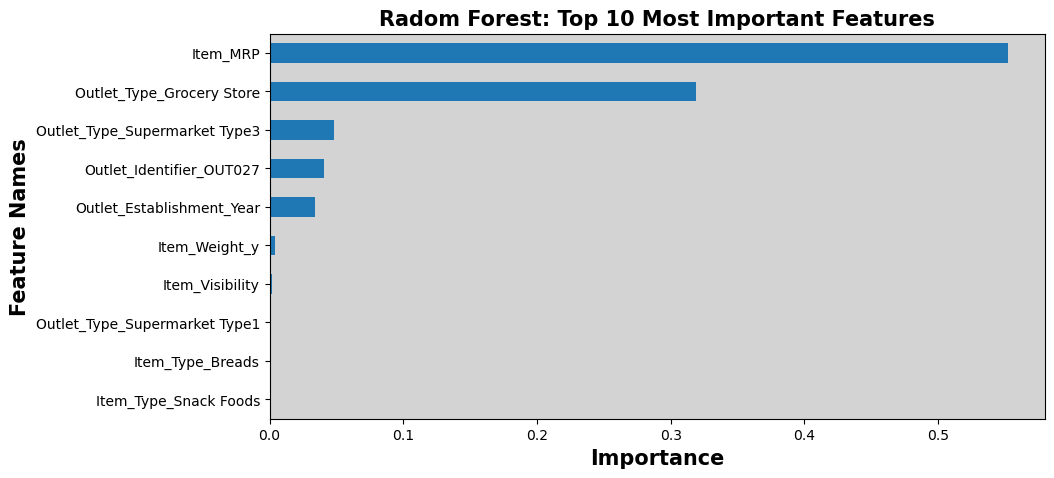

### Compare the most important features according to SHAP vs. your original feature importances.

As we can see above, SHAP's importances is similar to the built-in random forest importances.  Item_MRP (price), Outlet_Type_Grocery Store, Outlet_Identifier_OUT027, Outlet_Type_Supermarket Type3 and Outlet_Establishment_Year_1985 were the most important features used by our model. 


Like feature importance SHAP visualization is not indicating which direction the features push the prediction. Let's remove the plot_type='bar' and create dot plot type that will provide this information.

## Create a summary plot - with plot_type='dot'

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


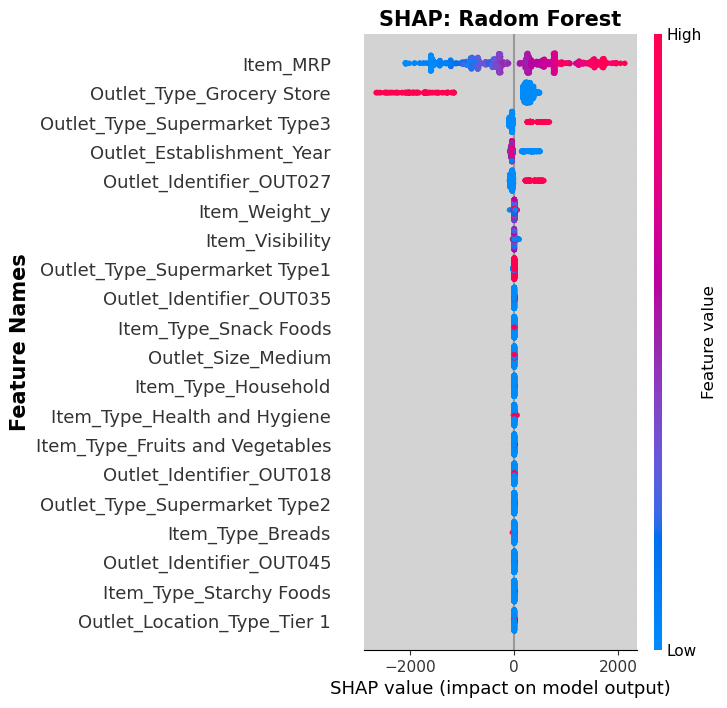

In [14]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap, show=False, plot_size=(7,7))

ax.set_title('SHAP: Radom Forest', fontsize = 15, weight = 'bold')
ax.set_ylabel('Feature Names', fontsize = 15, fontweight='bold')
ax.set_facecolor("lightgray")
fig.savefig(r'C:\Users\esnak\OneDrive\Desktop\coding_dojo/summary_plot_rf.png')

### Interpret the top 3 most important features and how they influence your model's predictions.

Item_MRP - if the price is high(red) increase sales, if is low (blue) decrease sales. 

Outlet_Type_Grocery Store - if it is a grocery store decrease sales. 

If the store is the # OUT027 or it is a supermarket Type3  increase sales. 

If it has lower year (blue) that means older outlet increase sales. 

# Local Explanations

In [15]:
## Making a vers of shap vars with 0-based integer index 
# so what it matches the index for the shap_vallues
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [16]:
X_shap_local

Item_Visibility  Item_MRP  Outlet_Establishment_Year  Item_Weight_y  \
0           0.074496  251.9724                     2002.0          9.500   
1           0.232122   55.5298                     1998.0          5.325   
2           0.027052   73.9354                     2007.0         20.700   
3           0.033778  222.8456                     1985.0          6.695   
4           0.187919   65.4168                     1998.0          8.420   
..               ...       ...                        ...            ...   
995         0.052594  111.0228                     1998.0          6.260   
996         0.000000   53.0640                     2004.0         14.000   
997         0.041474   93.0804                     1997.0         17.350   
998         0.024701  176.8686                     2002.0         13.150   
999         0.099963  193.8452                     1997.0          7.235   

     Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                         1.0                       0.0   
1                         0.0                       1.0   
2                         1.0                       0.0   
3                         1.0                       0.0   
4                         1.0                       0.0   
..                        ...                       ...   
995                       1.0                       0.0   
996                       0.0                       1.0   
997                       0.0                       1.0   
998                       1.0                       0.0   
999                       1.0                       0.0   

     Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                       0.0               0.0                  0.0   
1                       0.0               0.0                  0.0   
2                       0.0               0.0                  0.0   
3                       0.0               0.0                  0.0   
4                       0.0               0.0                  0.0   
..                      ...               ...                  ...   
995                     0.0               0.0                  0.0   
996                     0.0               0.0                  0.0   
997                     0.0               0.0                  0.0   
998                     0.0               0.0                  0.0   
999                     0.0               0.0                  0.0   

     Item_Type_Canned  ...  Outlet_Size_Medium  Outlet_Size_Small  \
0                 0.0  ...                 0.0                0.0   
1                 0.0  ...                 0.0                0.0   
2                 0.0  ...                 0.0                0.0   
3                 0.0  ...                 1.0                0.0   
4                 0.0  ...                 0.0                0.0   
..                ...  ...                 ...                ...   
995               0.0  ...                 0.0                0.0   
996               0.0  ...                 0.0                1.0   
997               0.0  ...                 0.0                1.0   
998               0.0  ...                 0.0                0.0   
999               0.0  ...                 0.0                1.0   

     Outlet_Size_Unknown  Outlet_Location_Type_Tier 1  \
0                    1.0                          0.0   
1                    1.0                          0.0   
2                    1.0                          0.0   
3                    0.0                          0.0   
4                    1.0                          0.0   
..                   ...                          ...   
995                  1.0                          0.0   
996                  0.0                          0.0   
997                  0.0                          1.0   
998                  1.0                          0.0   
999                  0.0                          1.0   

     Outlet_Location_Type_Ti

## Examples to explore : store that had low sales  and one with high sales.

In [17]:
# Let's see the range of the target 

y_shap_local.describe()

count     1000.000000
mean      2272.507894
std       1709.530129
min         38.616400
25%        931.620650
50%       1961.446800
75%       3078.825650
max      10306.584000
Name: Item_Outlet_Sales, dtype: float64

## Selecting a store that had low sales ( one of the lowest values for your target)

In [18]:
# what is the max/range of infant deaths
idx_low_sales = y_shap_local.idxmin()
idx_low_sales

63

In [19]:
# checking the feature values for selected example
# checking the feature values for selected example
row_low_sales = 63
print(f"- Row #: {row_low_sales}")
print(f"- Target: {y_shap.iloc[row_low_sales]}")
X_shap.iloc[row_low_sales].round(2)

- Row #: 63
- Target: 38.6164


Item_Visibility                       0.17
Item_MRP                             39.92
Outlet_Establishment_Year          1985.00
Item_Weight_y                        12.85
Item_Fat_Content_Low Fat              1.00
Item_Fat_Content_Regular              0.00
Item_Type_Baking Goods                0.00
Item_Type_Breads                      0.00
Item_Type_Breakfast                   0.00
Item_Type_Canned                      0.00
Item_Type_Dairy                       0.00
Item_Type_Frozen Foods                1.00
Item_Type_Fruits and Vegetables       0.00
Item_Type_Hard Drinks                 0.00
Item_Type_Health and Hygiene          0.00
Item_Type_Household                   0.00
Item_Type_Meat                        0.00
Item_Type_Others                      0.00
Item_Type_Seafood                     0.00
Item_Type_Snack Foods                 0.00
Item_Type_Soft Drinks                 0.00
Item_Type_Starchy Foods               0.00
Outlet_Identifier_OUT010              0.00
Outlet_Iden

## Selecting a store that had high sales ( one of the highest values for your target)

### high sales

In [20]:
# what is the max/range of infant deaths
idx_high_sales = y_shap_local.idxmax()
idx_high_sales

568

In [21]:
# checking the feature values for selected example
row_high_sales = 568
print(f"- Row #: {row_high_sales}")
print(f"- Target: {y_shap.iloc[row_high_sales]}")
X_shap.iloc[row_high_sales].round(2)


- Row #: 568
- Target: 10306.584


Item_Visibility                       0.03
Item_MRP                            228.04
Outlet_Establishment_Year          1985.00
Item_Weight_y                         8.42
Item_Fat_Content_Low Fat              0.00
Item_Fat_Content_Regular              1.00
Item_Type_Baking Goods                0.00
Item_Type_Breads                      0.00
Item_Type_Breakfast                   0.00
Item_Type_Canned                      1.00
Item_Type_Dairy                       0.00
Item_Type_Frozen Foods                0.00
Item_Type_Fruits and Vegetables       0.00
Item_Type_Hard Drinks                 0.00
Item_Type_Health and Hygiene          0.00
Item_Type_Household                   0.00
Item_Type_Meat                        0.00
Item_Type_Others                      0.00
Item_Type_Seafood                     0.00
Item_Type_Snack Foods                 0.00
Item_Type_Soft Drinks                 0.00
Item_Type_Starchy Foods               0.00
Outlet_Identifier_OUT010              0.00
Outlet_Iden

## Force Plot  

###  Random Forest explanation

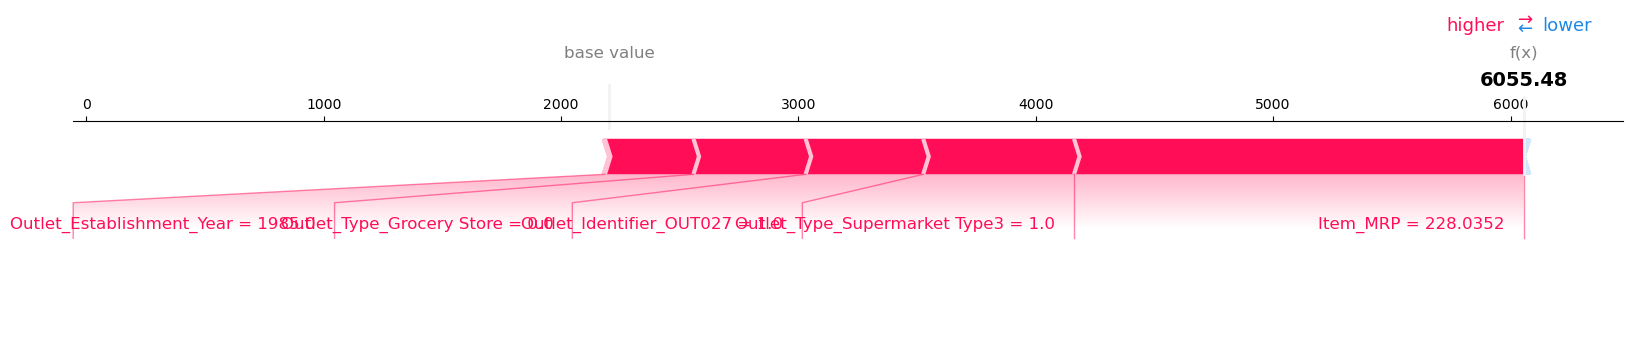

In [22]:
## Individual forceplot of example max sales (from Random Forest)

force_plot_rf = shap.force_plot(explainer.expected_value,
                shap_values[idx_high_sales].values,
               X_shap_local.iloc[idx_high_sales], matplotlib=True # <--
)

force_plot_rf

### Linear regression explanation 

In [23]:
## Create an explainer for the lin_reg
explainer_linreg = shap.Explainer(LinearRegression, X_shap)
explainer_linreg

In [24]:
## get shap values for linreg
shap_values_linreg = explainer_linreg(X_shap)
shap_values_linreg.shape

(1000, 43)

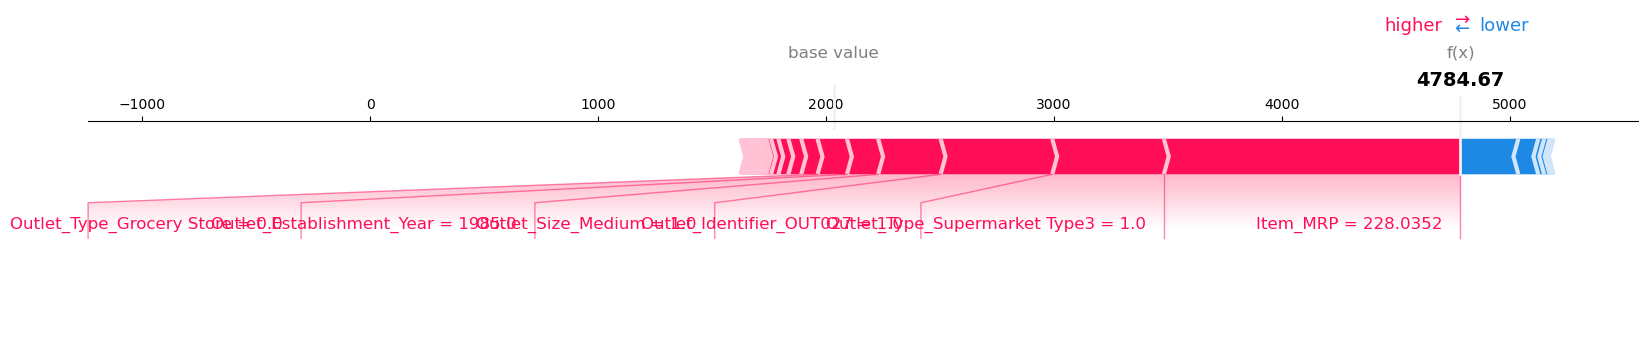

In [25]:
# Individual forceplot of example max sales (from Linear regression)

shap.force_plot(explainer_linreg.expected_value,
                shap_values_linreg[idx_high_sales].values,
               X_shap_local.iloc[idx_high_sales], matplotlib=True # <--
)


### Interpret what features most heavily influenced the predictions

The red features push the prediction to a greater value (higher sales), while the blue features push the prediction to a lower value (lower sales).

We can see if the outlet is supermarket type 3, was established in 1985 and is OUT027  these features push the prediction to a higher sales. 

The prediction with random forest was higher than with linear regression. 

## Lime tabular explanation

In [26]:
## Create a lime explainer with X_shap_local with regression as the mode
lime_explainer =LimeTabularExplainer(training_data=X_shap_local.values, feature_names=X_shap.columns, mode='regression')
lime_explainer



### Linear Regression 

#### High sales

In [28]:
## Use the lime explainer to explain the selected example used above 

exp_high_sales_lr = lime_explainer.explain_instance(X_shap_local.iloc[row_high_sales],
                               LinearRegression.predict)
exp_high_sales_lr.show_in_notebook()



X does not have valid feature names, but LinearRegression was fitted with feature names


#### Low sales

In [ ]:
## Use the lime explainer to explain the selected example used above 

exp = lime_explainer.explain_instance(X_shap_local.iloc[row_low_sales],
                               LinearRegression.predict, matplotlib=True # <--
)
exp.show_in_notebook()

### Random Forest

#### high sales

In [29]:

exp_high_sales_rf = lime_explainer.explain_instance(X_shap_local.iloc[row_high_sales],
                               RandomForestRegressor.predict)
exp_high_sales_rf.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


#### low sales

In [30]:

exp = lime_explainer.explain_instance(X_shap_local.iloc[row_low_sales],
                               RandomForestRegressor.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


### Interpret what features most heavily influenced the predictions, according to LIME.

For high sales, we can see if the outlet is supermarket type 3, was established in 1985, is OUT027 and has high price (ITEM_MRP)  pushes the prediction to a higher sales with Linear Regression model and Random Forest. With Linear Regression also with the outlet is medium size increase the sales.

For low sales, we can see if the outlet is Grocery Store and  has low Item_MRP push the sales to low values. 
With Linear Regression with outlet is OUT019 decrease the sales and with Random Forest sell frozen foods decrease sales.  